<a href="https://colab.research.google.com/github/nstfchloe/adv_ml/blob/Kristin/5074_Project_1_ChenchenLi_StephanieYao_KristinQi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Member
- Chenchen Li - cl4588
- Stephanie Yao - yy3508
- Kristin Qi - lq2243

# Link to your Public Github repository with Final report  :  https://github.com/nstfchloe/adv_ml



### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Upload the CSV dataset to FILES in the left bar
# Load the dataset
whr_df = pd.read_csv('WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [26]:
# Check the columns names in this dataset
print(whr_df.columns)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


In [27]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = ## Complete in a similar manner as above

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

Answer: The line y_train_labels = y_train.astype('category').cat.codes converts categorical labels in y_train into numerical codes. The astype('category') method transforms y_train into a categorical type, and .cat.codes assigns each category a unique integer, typically in alphabetical order (e.g., 'Average' → 0, 'High' → 1). This is useful for machine learning models that require numerical input.

The difference is that y_train contains original string labels like "Low, High", while y_train_labels holds their numerical representations like "2, 1". Use the same method for y_test with y_test_labels = y_test.astype('category').cat.codes to maintain consistent coding.

In [ ]:
### Maybe not in alphabetical order?

: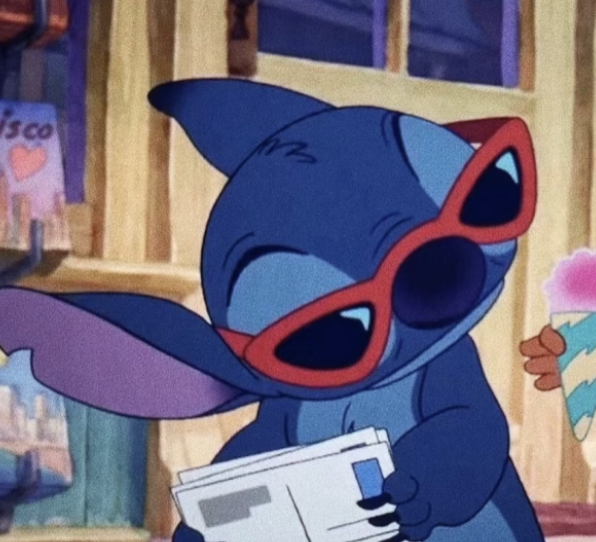

Answer_Steph: The line y_train.astype('category').cat.codes converts the categorical variable y_train (which contains labels like "Very Low", "Low", "Average", "High", "Very High") into numerical codes.

Difference between y_train_labels and y_train

y_train: Contains the original categorical labels (e.g., "Very Low", "Low", "Average", etc.).

y_train_labels: Contains the corresponding numerical codes (0, 1, 2, 3, 4) that can be used in machine learning models.

This transformation allows classification models to work with categorical data numerically while preserving the ordinal nature of happiness categories.

<h3> Add new data

In [31]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [32]:
# Check the column name from new dataset
print(countrydata.columns)

Index(['country_name', 'population', 'population_below_poverty_line', 'hdi',
       'life_expectancy', 'expected_years_of_schooling',
       'mean_years_of_schooling', 'gni'],
      dtype='object')


In [33]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Merge 'country' column back into X_train and X_test for merging purposes
X_train = X_train.merge(whr_df[['country']], left_index=True, right_index=True)
X_test = X_test.merge(whr_df[['country']], left_index=True, right_index=True)

# Perform an inner merge with countrydata based on country names
X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='inner').drop(columns=['country', 'country_name'])
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='inner').drop(columns=['country', 'country_name'])


In [34]:
# check merged the dataset
X_train.head(1)

,country_x,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_y,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


In [35]:
print(X_train.columns)

Index(['country_x', 'region', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_y', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni'],
      dtype='object')


In [36]:
print(X_train.columns.duplicated())


[False False False False False False False False False False False False
 False False False False]


In [37]:
# Create a new 'country' column using the values from 'country_x' and 'country_y'
X_train['country'] = X_train['country_x'].combine_first(X_train['country_y'])

# Drop the old 'country_x' and 'country_y' columns
X_train.drop(columns=['country_x', 'country_y'], inplace=True)

# Verify the result
print(X_train.columns)


Index(['region', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'country'],
      dtype='object')


In [38]:
# Create a new 'country' column using the values from 'country_x' and 'country_y'
X_test['country'] = X_test['country_x'].combine_first(X_test['country_y'])

# Drop the old 'country_x' and 'country_y' columns
X_test.drop(columns=['country_x', 'country_y'], inplace=True)

# Verify the result
print(X_test.columns)

Index(['region', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'country'],
      dtype='object')


## 1.  EDA

In [39]:
print(X_train.dtypes)

region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                         int64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
country                           object
dtype: object


Describe what you see above?

Answer：The X_train dataset contains both categorical (object type) and numerical (float64 and int64 types) features. Categorical columns include country, country_name, and region, which may be useful for regional analysis or as model features. Numerical columns consist of continuous variables like gdp_per_capita, social_support, healthy_life_expectancy, and freedom_to_make_life_choices, as well as the integer population column. This mix of data types is suitable for exploratory data analysis (EDA) and machine learning, with numerical features ready for modeling and categorical features potentially requiring encoding.

Your answer_Steph: 1. Duplicate Country and Region Columns
country_x (object), country_y (object), region (object)
These columns likely come from both datasets.
country_x and country_y represent the same country but from different datasets.
region is also a categorical variable that might not be necessary for numerical modeling.

2. Numerical Features (Float and Integer Data Types)
1) Economic Indicators:

gdp_per_capita (float64), gni_x (float64), gni_y (float64)
These represent financial prosperity of countries, but gni_x and gni_y might be duplicates from different datasets.

2) Social and Health Metrics:

social_support (float64), healthy_life_expectancy (float64), freedom_to_make_life_choices (float64), generosity (float64), perceptions_of_corruption (float64)
These describe factors contributing to happiness.

3) Population and Education Metrics:

population_x (int64), population_y (int64), population_below_poverty_line_x (float64), population_below_poverty_line_y (float64)
expected_years_of_schooling_x (float64), expected_years_of_schooling_y (float64)
mean_years_of_schooling_x (float64), mean_years_of_schooling_y (float64)
These are demographic indicators, but _x and _y columns indicate potential duplication.

4) Human Development Index & Life Expectancy:

hdi_x (float64), hdi_y (float64), life_expectancy_x (float64), life_expectancy_y (float64)
These indicate overall human development and longevity, but duplication suggests we need to keep only one version.

3. Potential Issues in the Data
Duplicate Features (_x and _y Columns):

These likely come from merging datasets where both contained similar features.
We need to inspect if the values differ or if one set should be dropped.
Object (Categorical) Variables (country_x, country_y, region):

These may need encoding or removal for numerical models.
Keeping both country_x and country_y is unnecessary.
Consistency in Data Types:

All numerical features are float64 or int64, which is ideal for modeling.
Object types (country_x, country_y, region) need preprocessing.


Find out the number and percentage of missing values in the table per column

In [40]:
# Your code here:

# Calculate the number of missing values per column
missing_values_count = X_train.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / len(X_train)) * 100

# Create a DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

print(missing_values_df)

                               Missing Values Count  Missing Values Percentage
region                                            0                   0.000000
gdp_per_capita                                    0                   0.000000
social_support                                    0                   0.000000
healthy_life_expectancy                           0                   0.000000
freedom_to_make_life_choices                      0                   0.000000
generosity                                        0                   0.000000
perceptions_of_corruption                         0                   0.000000
population                                        0                   0.000000
population_below_poverty_line                    10                  11.235955
hdi                                               0                   0.000000
life_expectancy                                   1                   1.123596
expected_years_of_schooling                       1 

Plot the frequency distribution / histogram of some of the numerical features that you think are important

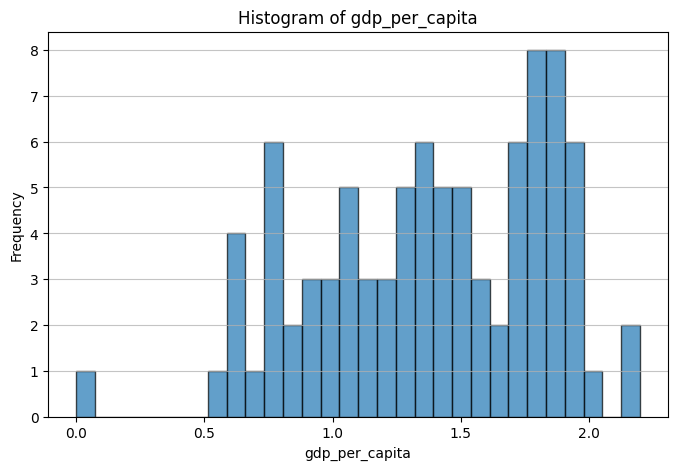

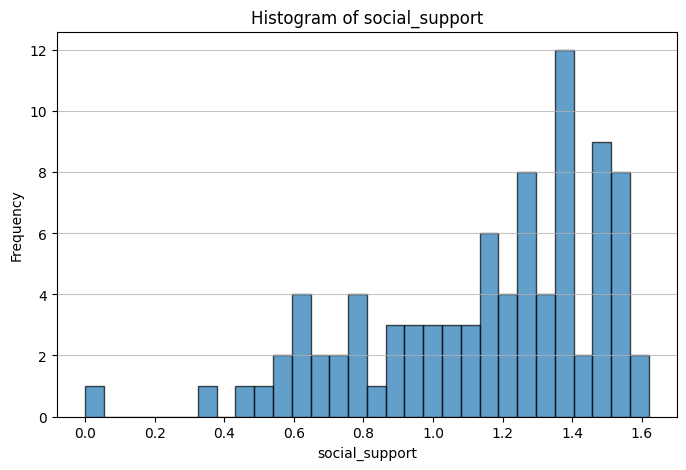

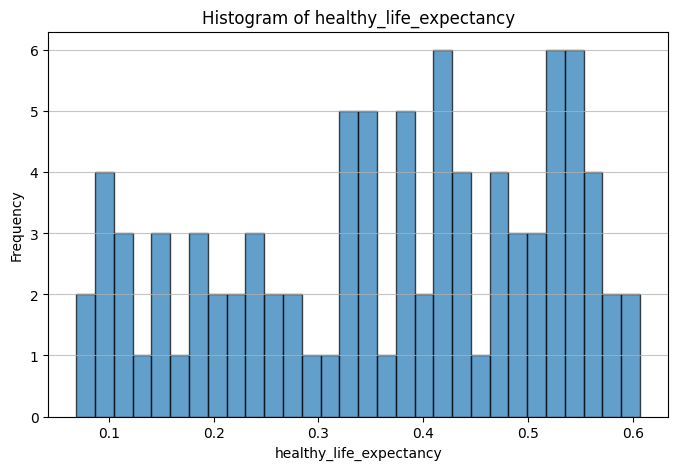

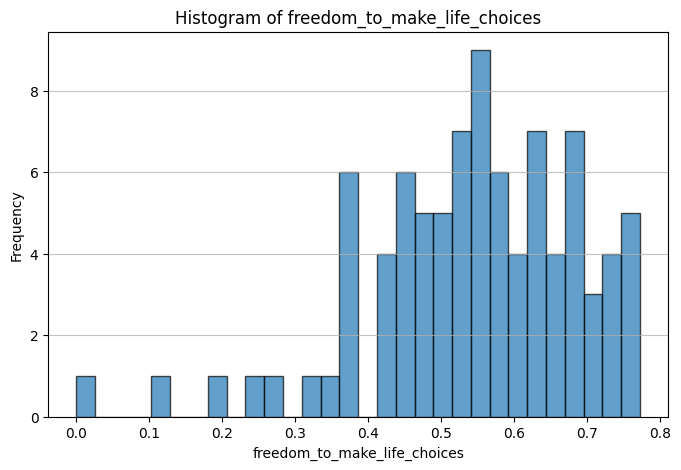

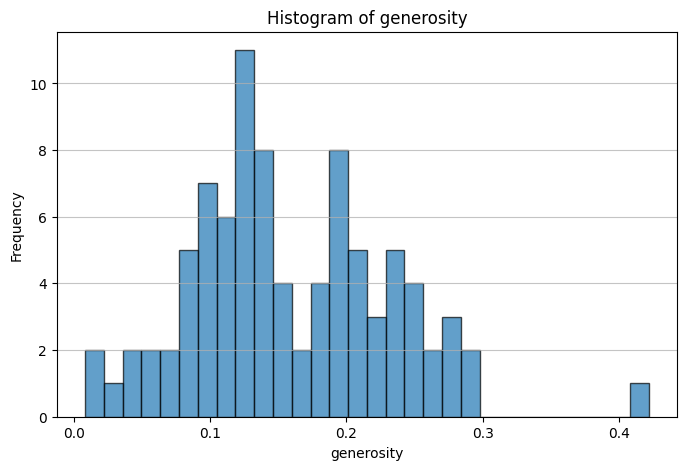

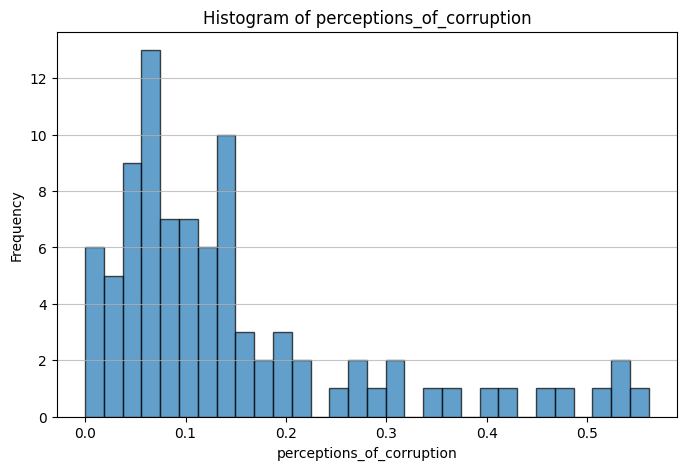

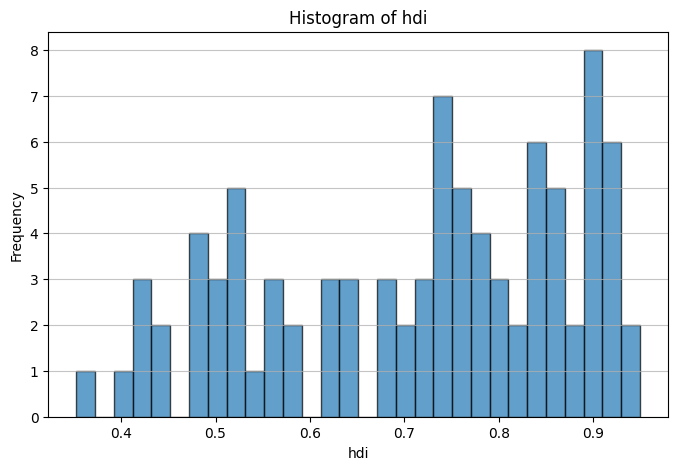

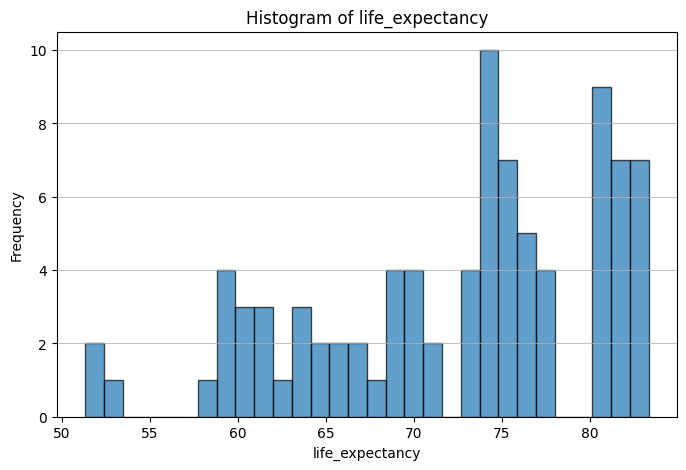

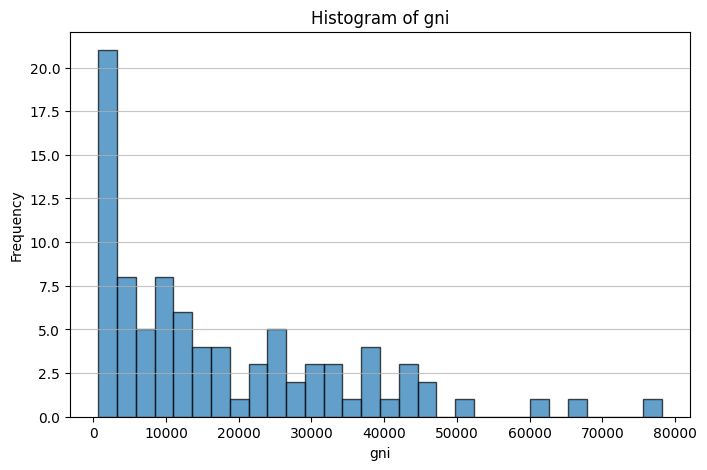

In [42]:
# Your plotting code here:

import matplotlib.pyplot as plt

# Select important numerical features for visualization
important_features = [
    "gdp_per_capita", "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption",
    "hdi", "life_expectancy", "gni"
]

# Plot histograms for selected features
for feature in important_features:
    plt.figure(figsize=(8, 5))
    plt.hist(X_train[feature].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Plot the categorical variables and their distribution

In [43]:
# Your code here:

# Checking the available categorical columns in X_train
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Display the categorical columns
print(categorical_columns)

['region', 'country']


<ipython-input-45-62d5dc59e43d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=column, palette='Set2', order=X_train[column].value_counts().index)


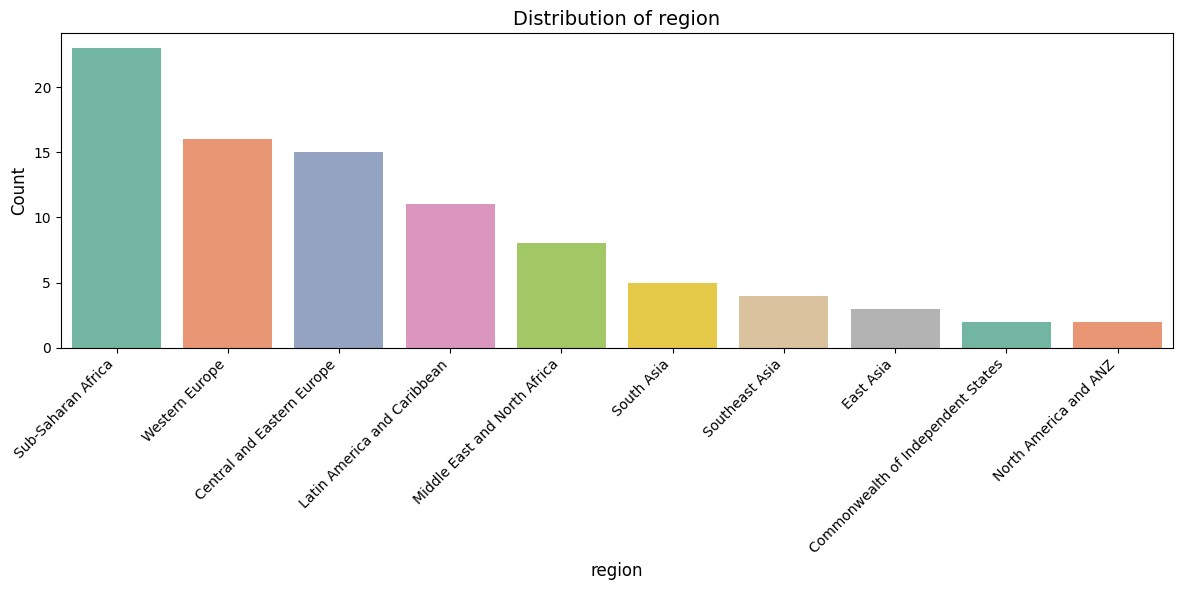

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only "region" variable matters to them
# Define categorical columns
categorical_columns = ['region']

# Plot the distribution of each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=X_train, x=column, palette='Set2', order=X_train[column].value_counts().index)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize here
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()


Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

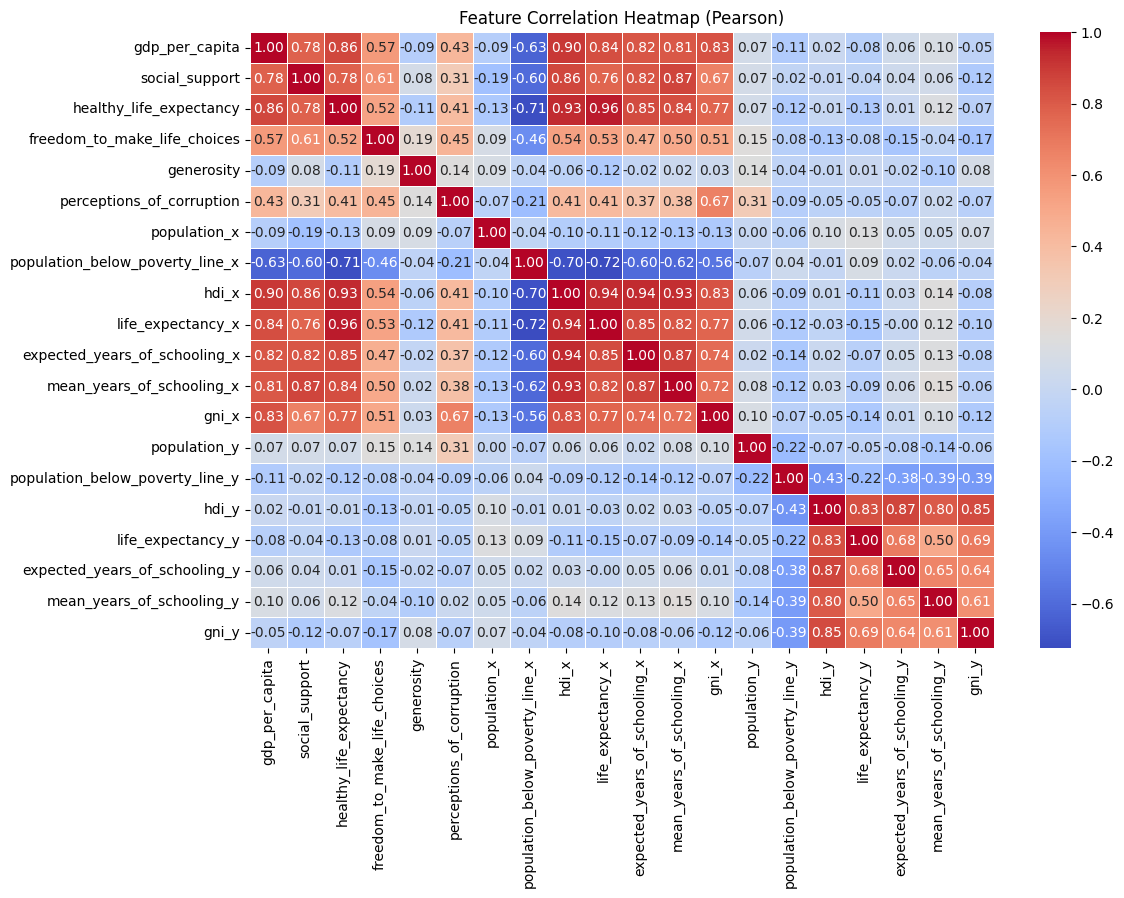

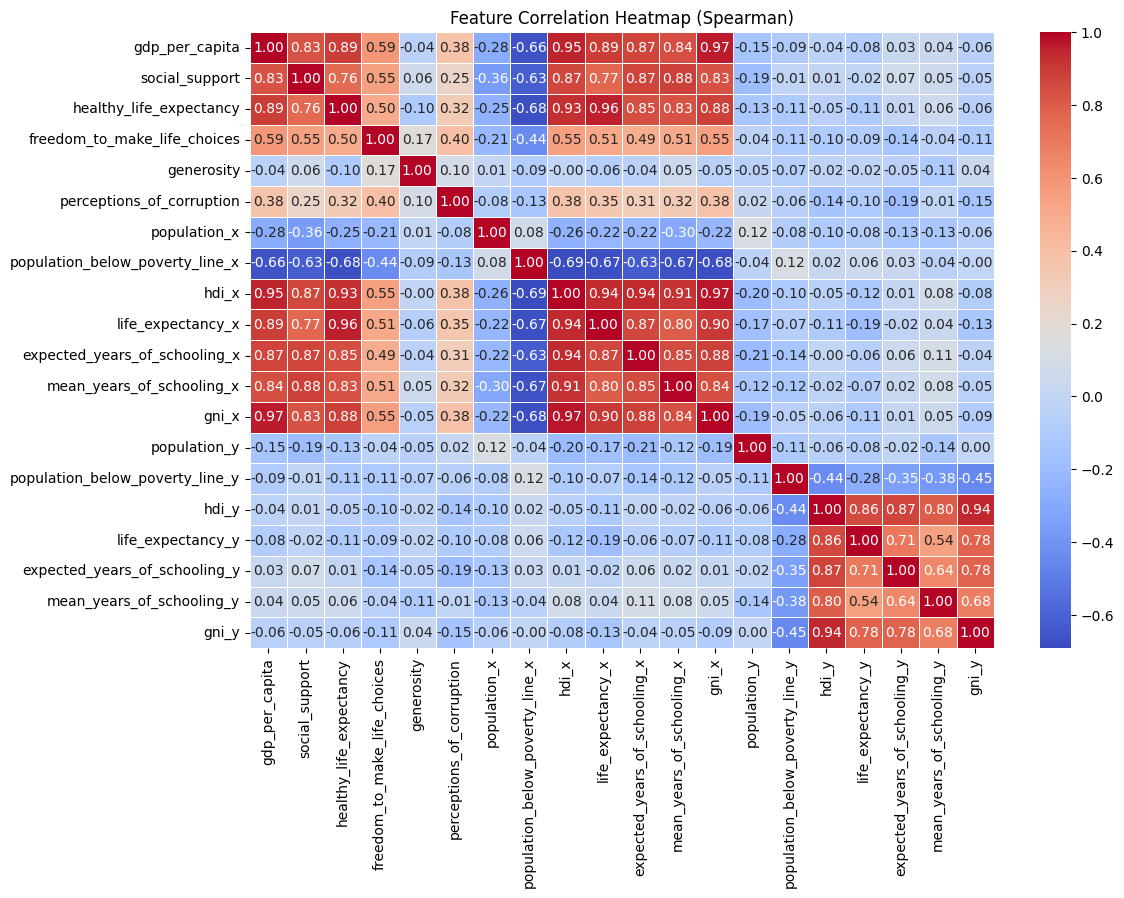

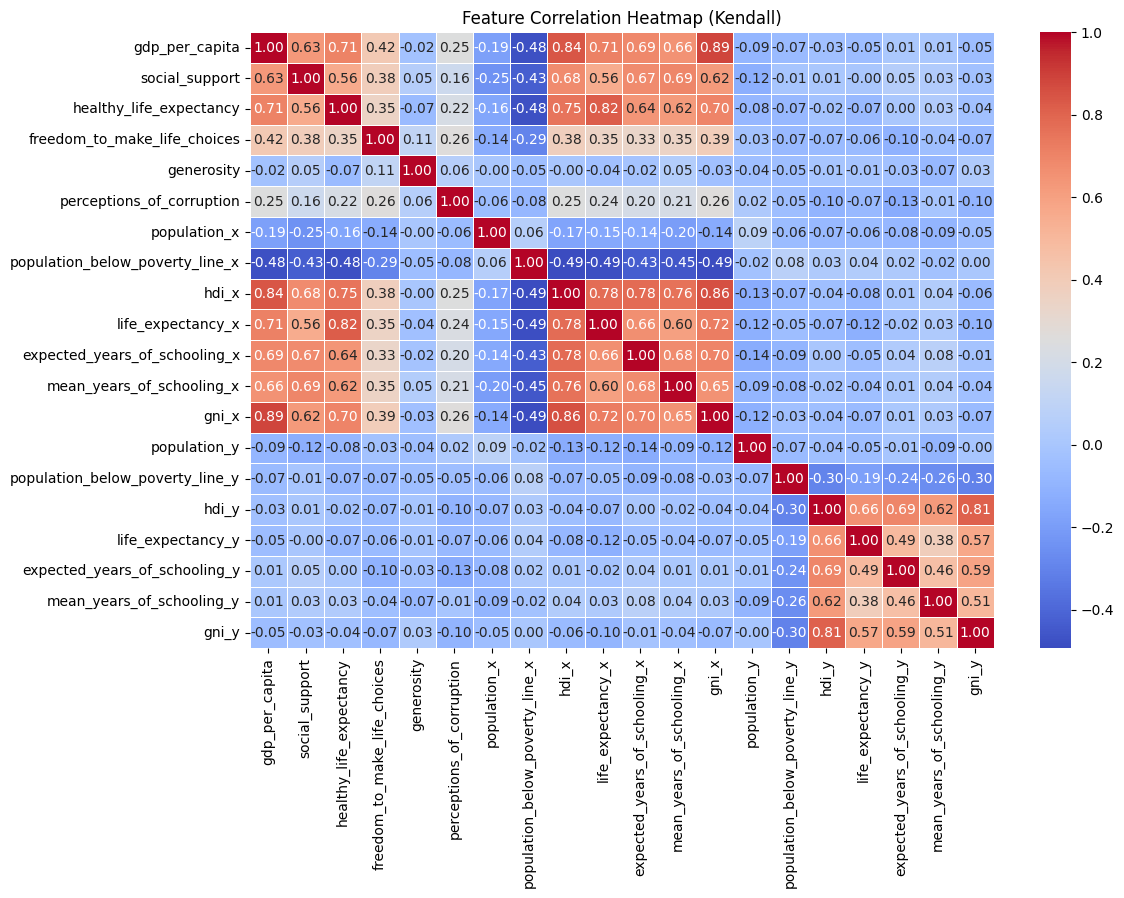

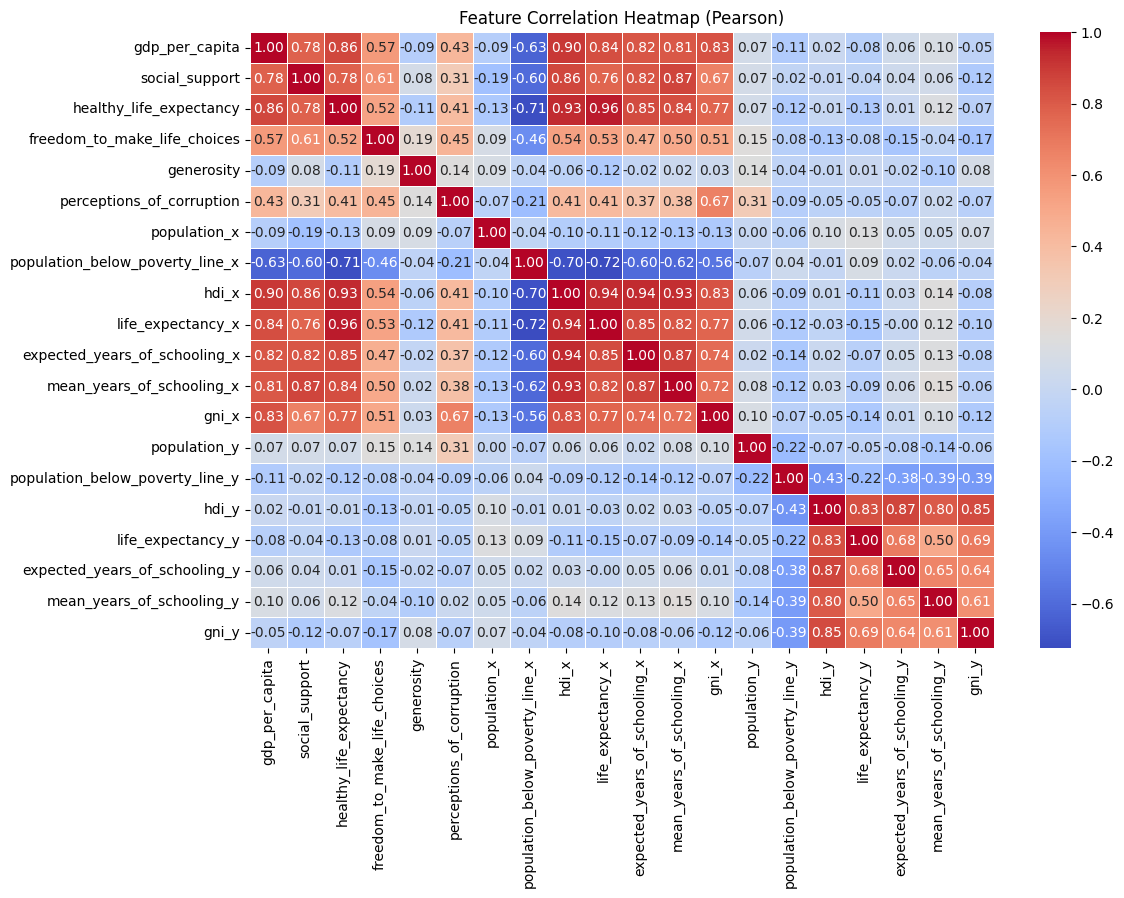

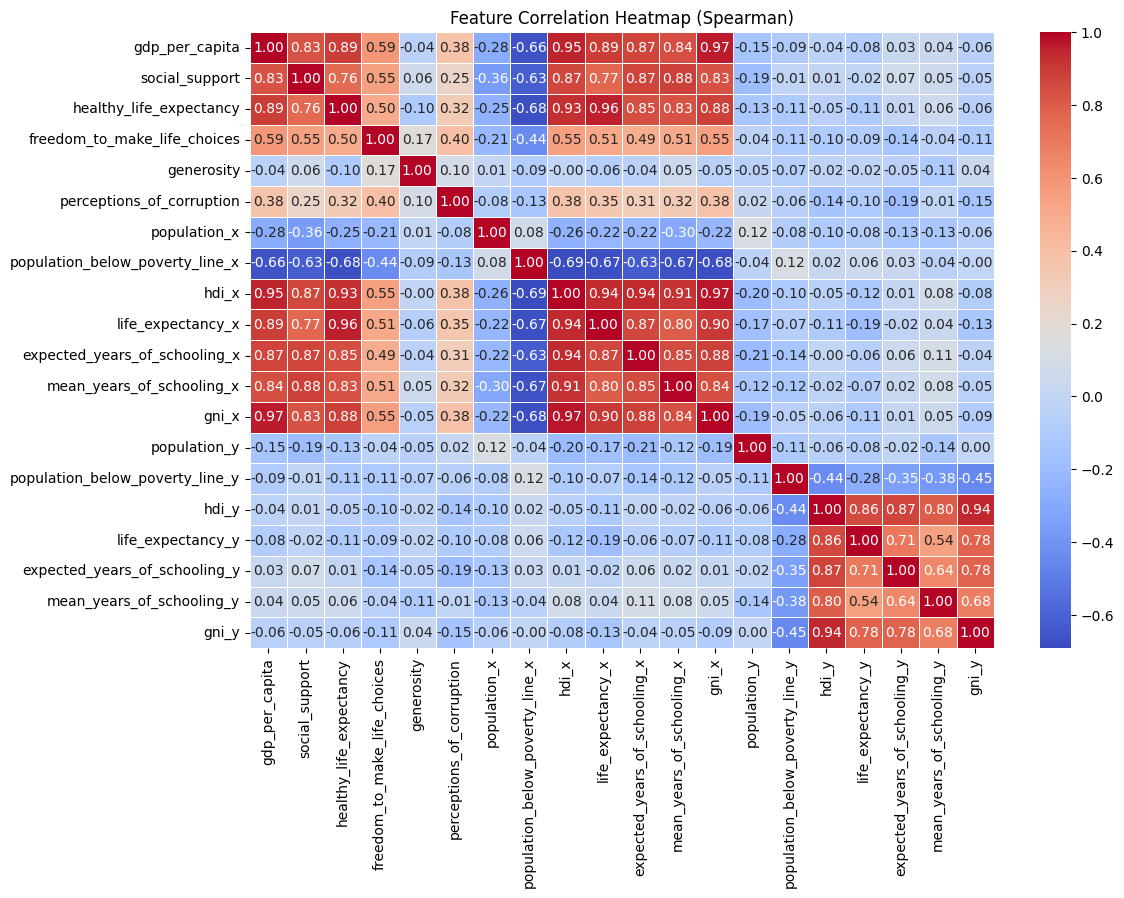

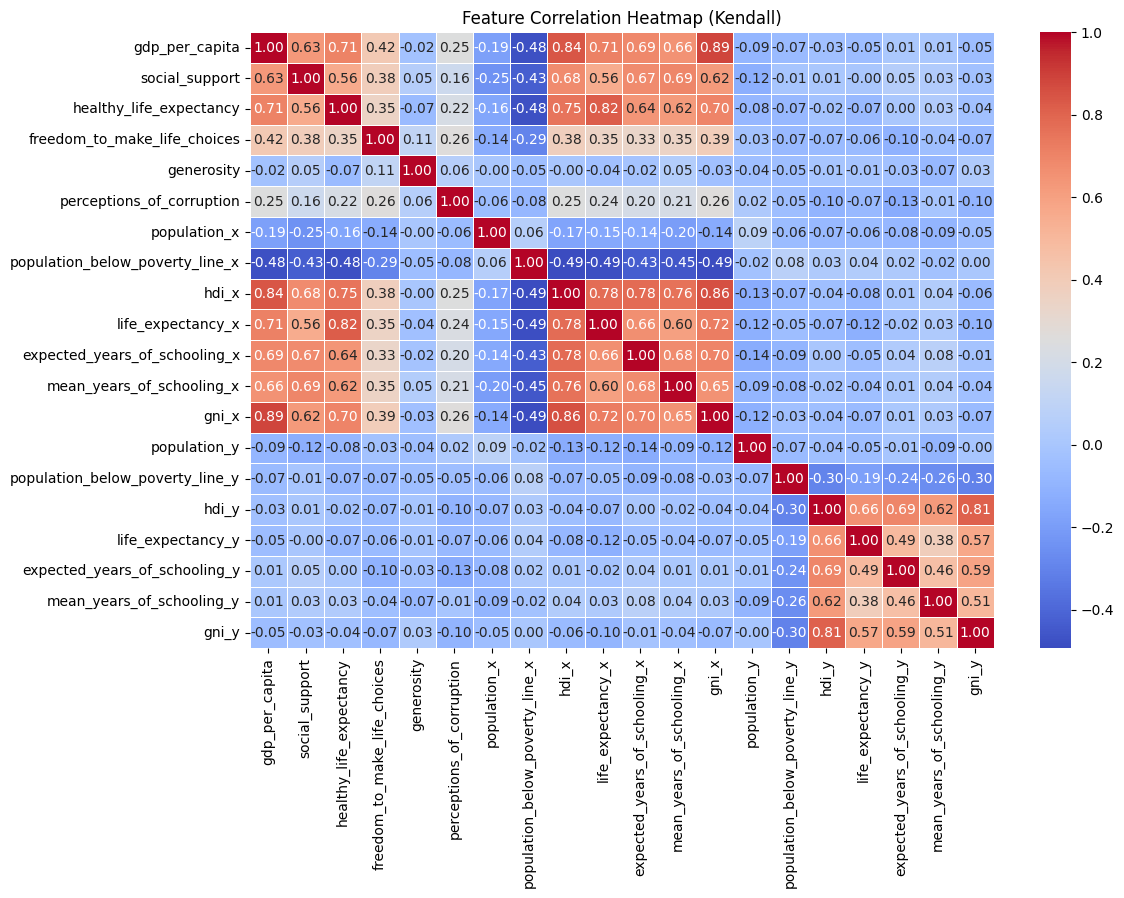

In [ ]:
# Your plotting code(s) here:


import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns before correlation analysis
X_train_numeric = X_train.drop(columns=non_numeric_columns)

# Compute the Pearson correlation matrix
correlation_matrix = X_train_numeric.corr(method='pearson')

# Plot the heatmap for Pearson correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Pearson)")
plt.show()

# Compute the Spearman correlation matrix
correlation_matrix_spearman = X_train_numeric.corr(method='spearman')

# Plot the heatmap for Spearman correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Spearman)")
plt.show()

# Compute the Kendall correlation matrix
correlation_matrix_kendall = X_train_numeric.corr(method='kendall')

# Plot the heatmap for Kendall correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Kendall)")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns before correlation analysis
X_train_numeric = X_train.drop(columns=non_numeric_columns)

# Compute the Pearson correlation matrix
correlation_matrix = X_train_numeric.corr(method='pearson')

# Plot the heatmap for Pearson correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Pearson)")
plt.show()

# Compute the Spearman correlation matrix
correlation_matrix_spearman = X_train_numeric.corr(method='spearman')

# Plot the heatmap for Spearman correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Spearman)")
plt.show()

# Compute the Kendall correlation matrix
correlation_matrix_kendall = X_train_numeric.corr(method='kendall')

# Plot the heatmap for Kendall correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Kendall)")
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
# Your code here:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert the regression target ('happiness_score') into classification labels using quartiles
whr_df['happiness_category'] = pd.qcut(
    whr_df['happiness_score'],
    q=5,
    labels=['Very Low', 'Low', 'Average', 'High', 'Very High']
)

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category', 'country', 'region'])
y = whr_df['happiness_category']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

# Merge country data with X_train and X_test
X_train = X_train.merge(whr_df[['country']], left_index=True, right_index=True)
X_test = X_test.merge(whr_df[['country']], left_index=True, right_index=True)

X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='inner').drop(columns=['country', 'country_name'])
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='inner').drop(columns=['country', 'country_name'])

# Identify non-numeric columns and drop them
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns.tolist()
X_train_numeric = X_train.drop(columns=non_numeric_columns)

# Add the target variable back to the dataset for correlation analysis
X_train_numeric['happiness_category'] = y_train_labels

In [ ]:
# Compute the correlation matrix including the target variable
correlation_matrix_with_target = X_train_numeric.corr()

# Plot the heatmap including the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_target, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap Including Target Variable")
plt.show()

In [ ]:
# Compute and display correlation of each feature with the target variable
correlation_with_target = correlation_matrix_with_target['happiness_category'].drop('happiness_category').sort_values(ascending=False)

print (correlation_with_target)

In [ ]:
# Scatter plots to explore relationships between selected features and the target variable
selected_features = correlation_with_target.index[:5]  # Select top 5 most correlated features

for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_train_numeric[feature], y=y_train_labels, alpha=0.6)
    plt.title(f"Scatter Plot: {feature} vs. Happiness Category")
    plt.xlabel(feature)
    plt.ylabel("Happiness Category")
    plt.grid(True)
    plt.show()

In [ ]:
# Ensure all selected features for the pairplot are numeric
numeric_selected_features = [feature for feature in selected_features if X_train_numeric[feature].dtype in ['int64', 'float64']]

# Drop any rows with NaN values in the selected numeric features
X_train_numeric_cleaned = X_train_numeric[numeric_selected_features + ['happiness_category']].dropna()

# Generate a pairplot using only cleaned numeric features
sns.pairplot(X_train_numeric_cleaned, vars=numeric_selected_features, hue="happiness_category", palette="viridis", diag_kind="kde")
plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [ ]:
# Your code here:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Outlier Detection using Box Plots
plt.figure(figsize=(15, 8))
X_train_numeric.boxplot(rot=45, patch_artist=True, vert=True)
plt.title("Box Plot of Numerical Features (Outlier Detection)")
plt.show()

In [ ]:
# Outlier Detection using Z-Score Analysis
z_scores = np.abs(stats.zscore(X_train_numeric))
outliers_zscore = (z_scores > 3).sum(axis=0)  # Count values beyond 3 standard deviations

In [ ]:
# Outlier Detection using the IQR Method
Q1 = X_train_numeric.quantile(0.25)
Q3 = X_train_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((X_train_numeric < (Q1 - 1.5 * IQR)) | (X_train_numeric > (Q3 + 1.5 * IQR))).sum()

In [ ]:
# Create a DataFrame to summarize outlier counts from both methods
outlier_summary = pd.DataFrame({
    "Z-Score Outliers": outliers_zscore,
    "IQR Outliers": outliers_iqr
}).sort_values(by="Z-Score Outliers", ascending=False)

print(outlier_summary)


Write what you observed and your General comments on what should be done:


Observations from the Outlier Analysis_Steph
1. Box Plot Observations
The box plot showed several outliers in different numerical features.
Some features, such as GDP per capita, generosity, and social support, exhibited a long tail, suggesting potential outliers.
The population variable had extreme values, likely due to large differences in country sizes.

2. Z-Score Outlier Analysis
Features like population, GDP per capita, and social support had outliers exceeding 3 standard deviations.
A few features had isolated extreme values, indicating possible data entry errors or natural variations.

3. IQR Outlier Analysis
The IQR method detected more outliers than the Z-score method.
Population-related variables and economic indicators had a high number of outliers, as these values tend to be highly skewed.

General Comments and Recommendations
1. Handling Outliers
Option 1: Remove Outliers (If Outliers Are Errors)

If outliers result from incorrect data entries, they should be removed to avoid misleading results.
This is common in datasets where errors or outliers significantly deviate from the norm.
Option 2: Cap or Winsorize Data (If Outliers Are Extreme but Valid)

Capping extreme values by replacing them with percentile-based thresholds (e.g., 1st and 99th percentile) helps reduce sensitivity to extreme values.
Option 3: Use Log Transformations (If Data Is Highly Skewed)

Features like population, GDP per capita, and income have natural long tails.
Applying a log transformation can normalize the distribution and reduce outlier impact.


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
# Your code here:

import numpy as np
import pandas as pd

# Identify skewed numerical features using skewness measure
skewed_features = X_train_numeric.skew().sort_values(ascending=False)

# Select features with high skewness (absolute skewness > 1)
highly_skewed_features = skewed_features[abs(skewed_features) > 1].index.tolist()

# Apply log transformation to highly skewed features (adding 1 to avoid log(0))
X_train_log_transformed = X_train_numeric.copy()
X_train_log_transformed[highly_skewed_features] = np.log1p(X_train_log_transformed[highly_skewed_features])

print(X_train_log_transformed)

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            0.632           0.779                    0.178   
1            1.099           0.764                    0.244   
2            1.379           1.494                    0.244   
3            0.972           1.248                    0.291   
4            1.358           1.354                    0.355   
..             ...             ...                      ...   
84           1.853           1.188                    0.603   
85           0.793           1.114                    0.250   
86           1.510           1.249                    0.468   
87           1.390           1.153                    0.499   
88           1.305           1.329                    0.411   

    freedom_to_make_life_choices  generosity  perceptions_of_corruption  \
0                          0.187       0.177                   0.125751   
1                          0.320       0.130                   0.178146   
2                 

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
# Your code here:


import pandas as pd

# Creating an Interaction Feature: GDP per Capita * Social Support
X_train_interaction = X_train_log_transformed.copy()
X_train_interaction["gdp_social_interaction"] = X_train_interaction["gdp_per_capita"] * X_train_interaction["social_support"]

print(X_train_interaction)

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            0.632           0.779                    0.178   
1            1.099           0.764                    0.244   
2            1.379           1.494                    0.244   
3            0.972           1.248                    0.291   
4            1.358           1.354                    0.355   
..             ...             ...                      ...   
84           1.853           1.188                    0.603   
85           0.793           1.114                    0.250   
86           1.510           1.249                    0.468   
87           1.390           1.153                    0.499   
88           1.305           1.329                    0.411   

    freedom_to_make_life_choices  generosity  perceptions_of_corruption  \
0                          0.187       0.177                   0.125751   
1                          0.320       0.130                   0.178146   
2                 

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify numeric features by selecting only numerical columns from X_train
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Define the numeric transformer: impute missing values with 0 and then standardize features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Replace missing numeric values with 0
    ('scaler', StandardScaler())  # Scale numeric features to have mean=0 and variance=1
])

# Define desired categorical features
desired_categorical_features = ['region', 'sub-region']

# Filter for the ones that actually exist in X_train
categorical_features = [col for col in desired_categorical_features if col in X_train.columns]

# Define the categorical transformer only if there are valid categorical features
if categorical_features:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features; ignore unknown categories
    ])
    # Combine numeric and categorical transformers into a single ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
else:
    # If no categorical features are found, use only numeric transformation
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Fit the preprocessor on X_train
preprocess = preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

Answer: The data preprocessing pipeline prepares numerical and categorical features in X_train for machine learning. First, numerical features are identified using the select_dtypes method. The numeric transformer pipeline includes imputation and scaling steps: missing values are filled with 0 using SimpleImputer(strategy='constant', fill_value=0), and StandardScaler standardizes features to have a mean of 0 and variance of 1. An alternative approach could be using the median (strategy='median') for imputation, which is more robust to outliers.

For categorical features, the transformer is applied only if relevant columns exist in X_train. It uses SimpleImputer(strategy='most_frequent') to replace missing values with the most common category, followed by OneHotEncoder(handle_unknown='ignore') to convert categories into a binary matrix. Alternatively, missing values could be filled with a placeholder like 'Unknown' for robustness.

The ColumnTransformer combines both transformers, applying specific preprocessing to numerical and categorical columns. If no categorical features are present, only the numeric transformation is used. The fit method finalizes the preprocessor by learning the required statistics from X_train, ensuring consistent data transformation. This pipeline enhances data quality, reduces biases, and prepares well-structured input for machine learning models.

Changes I would make: Instead of filling missing numerical values with 0 (strategy='constant', fill_value=0), I would change the imputer strategy to 'median'.

In [ ]:
# Write a function to transform data using the fitted preprocessor
def transform_data(data):
    # Drop 'country' if it exists, but keep 'region' since it's expected by the preprocessor.
    data = data.drop(['country'], axis=1, errors='ignore')
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?


Answer: The "preprocessor" object is a tool that sets up how to handle different types of data, like scaling numbers or turning categories into numbers using ColumnTransformer. The "preprocess" object is the same tool but trained on the data, meaning it has learned what values to use for filling in missing data or how to scale numbers properly.

The "preprocessor" function is a custom function that uses the preprocess object to transform new data in the same way as the training data. This makes sure the model gets data in the same format every time, whether it's for training, testing, or making predictions. Finally, the "preprocessed_data" is what comes out of this function—a cleaned-up version of the data, ready for the model to use. It's a numerical dataset where all the features are standardized, filled in, and encoded correctly.

In [ ]:
# Check the shape of X_train after preprocessing using our new function
print(transform_data(X_train).shape)

(89, 13)


## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df1 = pd.read_csv('WHR_2023.csv')
df2 = pd.read_csv("newcountryvars.csv")

# We want to rename 'country_name' in df2 to match 'country' in df1
df2.rename(columns={'country_name': 'country'}, inplace=True)

# We want to merge datasets on 'country'
df = df1.merge(df2, on='country', how='inner')

# We want to check if 'region' exists, else remove it
if 'region' not in df.columns:
    categorical_features = ['country']
else:
    categorical_features = ['country', 'region']

# Ensure no missing target values
df = df.dropna(subset=['happiness_score'])

# Convert happiness_score to categories
df['happiness_category'] = pd.qcut(df['happiness_score'], q=3, labels=[0, 1, 2])
y = df['happiness_category']

# Define numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('happiness_score')  # Exclude target variable

# Define preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Prepare training and testing data
X = df[numeric_features + categorical_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


0.7692307692307693


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
# Directly use the preprocessed data
model_q5 = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
model_q5.fit(X_train_preprocessed, y_train)

prediction_labels_q5 = model_q5.predict(X_test_preprocessed)

# Evaluate model performance
accuracy_q5 = accuracy_score(y_test, prediction_labels_q5)
print(f"Q5 Model Accuracy: {accuracy_q5:.4f}")

print("\nClassification Report (Q5):")
print(classification_report(y_test, prediction_labels_q5))

print("\nConfusion Matrix (Q5):")
print(confusion_matrix(y_test, prediction_labels_q5))


Q5 Model Accuracy: 0.7692

Classification Report (Q5):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.60      0.75      0.67         8
           2       1.00      0.60      0.75        10

    accuracy                           0.77        26
   macro avg       0.80      0.78      0.77        26
weighted avg       0.82      0.77      0.77        26


Confusion Matrix (Q5):
[[8 0 0]
 [2 6 0]
 [0 4 6]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Define a new preprocessor and model specifically for Q5
preprocessor_q5 = preprocessor  # Use the same preprocessing steps
model_q5 = RandomForestClassifier(random_state=42)

# Create a new pipeline for Q5
model_pipeline_q5 = Pipeline(steps=[
    ('preprocessor', preprocessor_q5),
    ('model', model_q5)
])

# Align data for Q5 to avoid any index mismatch
X_train_q5, y_train_labels_q5 = X_train.align(y_train_labels, join='inner', axis=0)
X_test_q5, y_test_labels_q5 = X_test.align(y_test_labels, join='inner', axis=0)

# Fit the Q5 model
model_pipeline_q5.fit(X_train_q5, y_train_labels_q5)

# Generate predictions for Q5
prediction_labels_q5 = model_pipeline_q5.predict(X_test_q5)

# Evaluate model performance for Q5
accuracy_q5 = accuracy_score(y_test_labels_q5, prediction_labels_q5)
print(f"Q5 Model Accuracy: {accuracy_q5:.4f}")

print("\nClassification Report (Q5):")
print(classification_report(y_test_labels_q5, prediction_labels_q5))

print("\nConfusion Matrix (Q5):")
print(confusion_matrix(y_test_labels_q5, prediction_labels_q5))


Q5 Model Accuracy: 0.6250

Classification Report (Q5):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.50      0.47      0.43         8
weighted avg       0.75      0.62      0.60         8


Confusion Matrix (Q5):
[[2 0 0 0 0]
 [2 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    max_features='sqrt'
)

model_2.fit(X_train_preprocessed, y_train)
prediction_labels_2 = model_2.predict(X_test_preprocessed)

accuracy_2 = accuracy_score(y_test, prediction_labels_2)
print(f"Model 2 Accuracy: {accuracy_2:.4f}")

print("\nClassification Report (Model 2):")
print(classification_report(y_test, prediction_labels_2))

print("\nConfusion Matrix (Model 2):")
print(confusion_matrix(y_test, prediction_labels_2))


Model 2 Accuracy: 0.6923

Classification Report (Model 2):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.50      0.38      0.43         8
           2       0.70      0.70      0.70        10

    accuracy                           0.69        26
   macro avg       0.67      0.69      0.67        26
weighted avg       0.67      0.69      0.67        26


Confusion Matrix (Model 2):
[[8 0 0]
 [2 3 3]
 [0 3 7]]


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

 Answer: For Model 2, I adjusted several parameters:

n_estimators: Increased from 50 to 100.

max_depth: Increased from 10 to 15.

min_samples_split: Set to 5, meaning a node must have at least 5 samples to be split.

min_samples_leaf: Set to 2, ensuring leaf nodes have at least 2 samples.

max_features: Changed to 'sqrt', which selects a subset of features at each split.

class_weight: Kept as 'balanced' to handle class imbalance.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Model 2 Performance
prediction_labels = model_2.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, prediction_labels)
print(f"Model 2 Accuracy: {accuracy:.4f}")

print("\nClassification Report (Model 2):")
print(classification_report(y_test, prediction_labels))

print("\nConfusion Matrix (Model 2):")
print(confusion_matrix(y_test, prediction_labels))


Model 2 Accuracy: 0.6923

Classification Report (Model 2):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.50      0.38      0.43         8
           2       0.70      0.70      0.70        10

    accuracy                           0.69        26
   macro avg       0.67      0.69      0.67        26
weighted avg       0.67      0.69      0.67        26


Confusion Matrix (Model 2):
[[8 0 0]
 [2 3 3]
 [0 3 7]]


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

Answer: Manually changing model parameters and testing random values can sometimes improve accuracy, but GridSearchCV is a more efficient approach. Instead of guessing, GridSearchCV systematically tests all possible parameter combinations and finds the best model using cross-validation to avoid overfitting. While it can be computationally heavy, it is much more effective than trying random values. A faster alternative is RandomizedSearchCV, which samples random parameter combinations and is useful for large parameter spaces. Both methods provide a smarter, more strategic approach to hyperparameter tuning.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
#Submit Model 3:

#-- Generate predicted values


## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = ## Read documentations of imported models and fit them.

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=#count features in input data

keras_model = ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:

In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Your code here:

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)

explainer = ## Initialize SHAP explainer using the trained model

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = ## Apply the explainer to X_test

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(## Pass the required parameters to create a summary plot)

# Your cell should output a SHAP summary plot showing the most important features.


<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked